In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

C:\Users\Cheng\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_img_train,y_label_train),(x_img_test,y_label_test) = cifar10.load_data()

In [3]:
print ("train data:", "images:", x_img_train.shape, "labels:", y_label_train.shape)
print ("test data: ", "images:", x_img_test.shape, "labels :",y_label_test.shape)

train data: images: (50000, 32, 32, 3) labels: (50000, 1)
test data:  images: (10000, 32, 32, 3) labels : (10000, 1)


In [4]:
x_img_train_normalize = x_img_train.astype('float32') /255.0
x_img_test_normalize = x_img_test.astype('float32')/255.0

In [5]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))

In [9]:
model.add(Dropout(rate=0.25))

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))

In [12]:
model.add(Dropout(0.25))

In [13]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [15]:
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.25))

In [16]:
model.add(Dense(10,activation='softmax'))

In [17]:
print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [19]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,validation_split=0.2, epochs=10, batch_size=128, verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 27s - loss: 1.4863 - acc: 0.4651 - val_loss: 1.2950 - val_acc: 0.5684
Epoch 2/10
 - 19s - loss: 1.1345 - acc: 0.5970 - val_loss: 1.1333 - val_acc: 0.6339
Epoch 3/10
 - 19s - loss: 0.9796 - acc: 0.6562 - val_loss: 1.0136 - val_acc: 0.6634
Epoch 4/10
 - 19s - loss: 0.8701 - acc: 0.6941 - val_loss: 0.9550 - val_acc: 0.6904
Epoch 5/10
 - 19s - loss: 0.7836 - acc: 0.7231 - val_loss: 0.8803 - val_acc: 0.7012
Epoch 6/10
 - 20s - loss: 0.7021 - acc: 0.7546 - val_loss: 0.8513 - val_acc: 0.7136
Epoch 7/10
 - 19s - loss: 0.6240 - acc: 0.7800 - val_loss: 0.8160 - val_acc: 0.7324
Epoch 8/10
 - 20s - loss: 0.5563 - acc: 0.8056 - val_loss: 0.7941 - val_acc: 0.7324
Epoch 9/10
 - 20s - loss: 0.4905 - acc: 0.8280 - val_loss: 0.7491 - val_acc: 0.7445
Epoch 10/10
 - 20s - loss: 0.4309 - acc: 0.8496 - val_loss: 0.7761 - val_acc: 0.7355


In [20]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoche')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

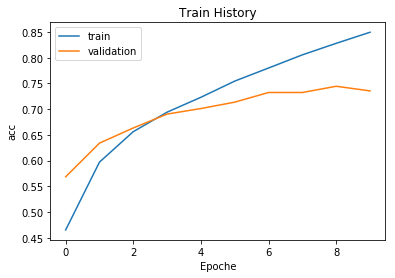

In [21]:
show_train_history(train_history,'acc','val_acc')

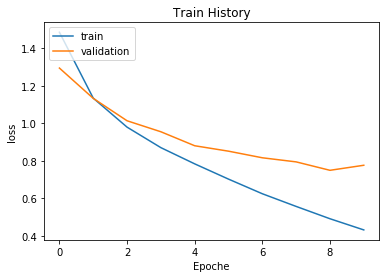

In [22]:
show_train_history(train_history,'loss','val_loss')

In [23]:
scores = model.evaluate(x_img_test_normalize,y_label_test_OneHot,verbose=0)
scores[1]

0.7272

In [24]:
prediction=model.predict_classes(x_img_test_normalize)

In [25]:
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=int64)

In [26]:
label_dict = {0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [27]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=0):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(num):    
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
        
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()    

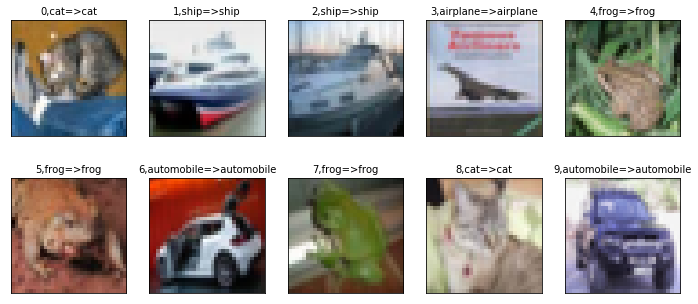

In [28]:
plot_images_labels_prediction(x_img_test, y_label_test, prediction, 0, 10)

In [29]:
Predicted_Probability = model.predict(x_img_test_normalize)

In [30]:
def show_Predicted_Probability(y,prediction,x_img,Prediction_Probability,i):
    print ('label:', label_dict[y[i][0]], 'predict', label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32,32,3)))
    plt.show()
    for j in range(10):
        print (label_dict[j] + 'probability: %1.9f' %(Predicted_Probability[i][j]))

label: cat predict cat


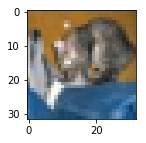

airplaneprobability: 0.009481246
automobileprobability: 0.003776194
birdprobability: 0.022949111
catprobability: 0.604572356
deerprobability: 0.008415609
dogprobability: 0.268205583
frogprobability: 0.045644194
horseprobability: 0.003995139
shipprobability: 0.032017555
truckprobability: 0.000943003


In [31]:
show_Predicted_Probability(y_label_test, prediction, x_img_test, Predicted_Probability,0)

label: frog predict frog


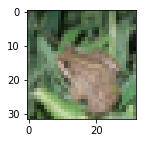

airplaneprobability: 0.000000149
automobileprobability: 0.000004133
birdprobability: 0.007988717
catprobability: 0.064879358
deerprobability: 0.030142352
dogprobability: 0.000092437
frogprobability: 0.896881044
horseprobability: 0.000000113
shipprobability: 0.000011523
truckprobability: 0.000000095


In [32]:
show_Predicted_Probability(y_label_test, prediction, x_img_test, Predicted_Probability,4)

label: airplane predict airplane


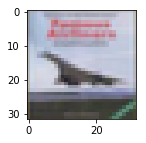

airplaneprobability: 0.465616494
automobileprobability: 0.003947576
birdprobability: 0.065638058
catprobability: 0.003726815
deerprobability: 0.031404093
dogprobability: 0.000196045
frogprobability: 0.000084576
horseprobability: 0.000164421
shipprobability: 0.428408384
truckprobability: 0.000813585


In [33]:
show_Predicted_Probability(y_label_test, prediction, x_img_test, Predicted_Probability,3)

In [34]:
prediction.shape

(10000,)

In [35]:
y_label_test.shape

(10000, 1)

In [36]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [37]:
import pandas as pd
print (label_dict)
pd.crosstab(y_label_test.reshape(-1), prediction, rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,798,5,84,12,10,0,10,8,56,17
1,46,747,28,16,6,4,16,2,57,78
2,46,2,703,30,86,32,75,13,8,5
3,22,6,144,486,70,141,96,18,13,4
4,23,1,106,25,733,15,66,22,9,0
5,12,2,109,145,56,593,46,26,6,5
6,7,3,49,32,21,14,867,1,6,0
7,17,1,84,21,85,55,10,719,5,3
8,46,14,27,9,10,6,9,1,868,10
